## TALLER DE PRACTICA 2

Diana Arias - Andrea valencia - Daniel Rengifo - Jovani Cely - Oscar Estrada

#### 1. Objetivo del proyecto de analitica

Explorar el estado de los datos y la relacion entre las caracteristicas socio-demograficas y los puntajes de las competencias evaluadas en las pruebas Saber TyT de los estudiantes de la institucion Educando Lideres en el año 2016

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### 2. Cargar base de datos y revisar errores

Se revisan caracteres y se asignan NaNs

In [2]:
df_full = pd.read_csv('SABERTYT20162.csv', sep=";", encoding='ISO-8859-1',  na_values=' ')
df_full

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_ESTADOCIVIL,ESTU_TIENE_ETNIA,ESTU_ETNIA,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,ESTU_ESTADO,INSE,NSE
0,CC,1 COLOMBIA,M,15/08/1990,20164,EK201640024941,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A2,79,59,121.0,4.0,87.0,85.0,PUBLICAR,"57,14241052",NSE3
1,CC,1 COLOMBIA,M,26/09/1990,20164,EK201640012159,ESTUDIANTE,SOLTERO,NaN,NaN,...,A2,75,74,123.0,4.0,89.0,87.0,PUBLICAR,"65,76637176",NSE4
2,CC,1 COLOMBIA,F,28/10/1994,20164,EK201640041435,ESTUDIANTE,SOLTERO,NO,NaN,...,B1,97,98,99.0,2.0,43.0,44.0,PUBLICAR,"47,68199591",NSE2
3,CC,1 COLOMBIA,F,24/09/1979,20164,EK201640003654,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A1,32,30,75.0,1.0,13.0,11.0,PUBLICAR,"55,56398024",NSE3
4,CC,1 COLOMBIA,M,6/07/1988,20164,EK201640018456,ESTUDIANTE,SOLTERO,NO,NaN,...,A1-,15,19,86.0,2.0,29.0,34.0,PUBLICAR,"27,01330074",NSE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,CC,1 COLOMBIA,M,22/01/1992,20164,EK201640005823,ESTUDIANTE,SOLTERO,NO,NaN,...,A1,38,56,104.0,3.0,57.0,63.0,PUBLICAR,"45,34484192",NSE1
53036,CC,1 COLOMBIA,M,7/07/1992,20164,EK201640005164,ESTUDIANTE,SOLTERO,NO,NaN,...,A1,48,68,75.0,1.0,12.0,15.0,PUBLICAR,"39,95548887",NSE1
53037,CC,1 COLOMBIA,M,7/09/1988,20164,EK201640001818,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A1,31,39,60.0,1.0,2.0,2.0,PUBLICAR,"60,76679974",NSE4
53038,CC,1 COLOMBIA,F,2/02/1994,20164,EK201640011583,ESTUDIANTE,SOLTERO,NO,NaN,...,A1,53,63,122.0,4.0,88.0,89.0,PUBLICAR,"69,01629674",NSE4


In [3]:
df_full.shape

(53040, 104)

El dataset contiene 53040 registros en 104 variables, contiene tipo int, float y object. Requiere ajuste de tipos de variables.

In [4]:
# Filtramos los registros de acuerdo con las instrucciones
df = df_full[df_full['ESTU_ESTADO'] == 'PUBLICAR']
df = df[df['ESTU_NACIONALIDAD'] == '1 COLOMBIA']

In [5]:
# Filtramos las columnas de interes para el ejercicio, para aliviar la carga de procesamiento y memoria
df = df[['ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENE_ETNIA', 'ESTU_ETNIA', 'ESTU_LIMITA_MOTRIZ', 'ESTU_LIMITA_INVIDENTE', 
'ESTU_LIMITA_CONDICIONESPECIAL', 'ESTU_LIMITA_SORDO', 'ESTU_LIMITA_AUTISMO', 'FAMI_ESTRATO_VIVIENDA', 'MOD_RAZONA_CUANTITAT_PUNT',
'MOD_LECTURA_CRITICA_PUNT' , 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT']]

#### 3. Realizar las modificaciones a la base de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52665 entries, 0 to 53039
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_GENERO                    52663 non-null  object 
 1   ESTU_FECHANACIMIENTO           52664 non-null  object 
 2   ESTU_TIENE_ETNIA               48374 non-null  object 
 3   ESTU_ETNIA                     3086 non-null   object 
 4   ESTU_LIMITA_MOTRIZ             46 non-null     object 
 5   ESTU_LIMITA_INVIDENTE          4 non-null      object 
 6   ESTU_LIMITA_CONDICIONESPECIAL  7 non-null      object 
 7   ESTU_LIMITA_SORDO              29 non-null     object 
 8   ESTU_LIMITA_AUTISMO            3 non-null      object 
 9   FAMI_ESTRATO_VIVIENDA          52663 non-null  object 
 10  MOD_RAZONA_CUANTITAT_PUNT      52665 non-null  int64  
 11  MOD_LECTURA_CRITICA_PUNT       52665 non-null  int64  
 12  MOD_COMPETEN_CIUDADA_PUNT      52665 non-null  int6

In [7]:
# Ajuste de tipo de variable para fecha de nacimiento
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'])

#### 4. Revisar la columna fecha de nacimiento

In [8]:
df['ESTU_FECHANACIMIENTO'].describe()

count                            52664
mean     1991-04-25 23:09:31.471973248
min                1944-12-13 00:00:00
25%                1988-04-23 00:00:00
50%                1993-08-07 00:00:00
75%                1996-03-16 00:00:00
max                2024-01-16 00:00:00
Name: ESTU_FECHANACIMIENTO, dtype: object

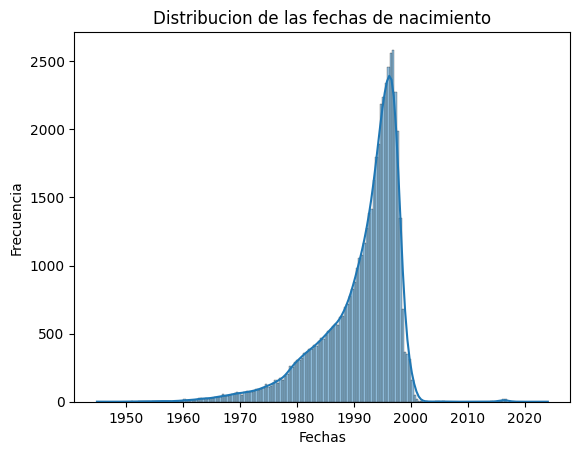

In [9]:
sns.histplot(data=df, x='ESTU_FECHANACIMIENTO', kde=True)  # El argumento kde=True agrega la estimación de densidad kernel
plt.title('Distribucion de las fechas de nacimiento')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')
plt.show()

Se observa que hay datos atipicos, ya que hay fechas de nacimiento muy recientes, incluso superiores a la fecha actual, y la informacion proviene de programas de nivel tecnico y tecnologico.

In [10]:
df['EDAD_PRUEBA'] = (datetime.datetime(2016, 10, 9) - df['ESTU_FECHANACIMIENTO']).dt.days
df['EDAD_PRUEBA'] = (df['EDAD_PRUEBA']/365.2425).round(0)

#### 5. Revisar la variable Nivel de ingles

In [11]:
df['MOD_INGLES_DESEM']

0         A2
1         A2
2         B1
3         A1
4        A1-
        ... 
53035     A1
53036     A1
53037     A1
53038     A1
53039    A1-
Name: MOD_INGLES_DESEM, Length: 52665, dtype: object

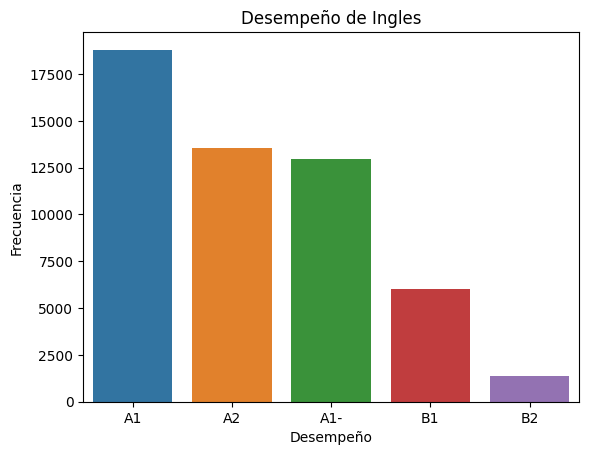

In [12]:
sns.countplot(x=df['MOD_INGLES_DESEM'], order = df['MOD_INGLES_DESEM'].value_counts().sort_values(ascending=False).index)
plt.title('Desempeño de Ingles')
plt.xlabel('Desempeño')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la mayoria de estudiantes solo llegaron al nivel A1

In [13]:
df['NIVEL_B1_B2'] = df['MOD_INGLES_DESEM'].apply(lambda x: 'CUMPLIO' if x in ['B1', 'B2'] else 'NO CUMPLIO')

In [14]:
total_filas = len(df)
cumplio_count = (df['NIVEL_B1_B2'] == 'CUMPLIO').sum()
porcentaje_cumplio = (cumplio_count / total_filas) * 100
print(f'El porcentaje que cumplió con la meta del Ministerio de Educacion fue: {porcentaje_cumplio:.2f}%')

El porcentaje que cumplió con la meta del Ministerio de Educacion fue: 13.98%
